In [34]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale



In [36]:
%matplotlib inline
rcParams['figure.figsize'] = 7, 4

In [37]:
np.set_printoptions(precision=4, suppress = True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [39]:
data = pd.read_csv('newAgregation.csv')

In [40]:
data.columns = ['coluna 1', 'coluna 2', 'coluna 3']

In [42]:
X = data[['coluna 1', 'coluna 2']].values
Y = data['coluna 3'].values

In [44]:
kmeans_model = KMeans(n_clusters=7, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.48208677595087357

In [46]:
Z= linkage(X,'single')

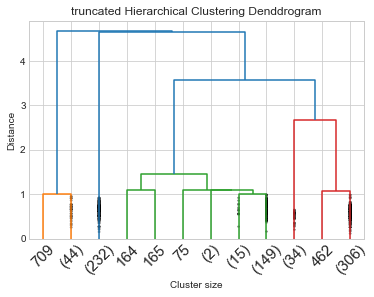

In [49]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted = True)
plt.title('truncated Hierarchical Clustering Denddrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [60]:
k = 6

Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage='single')

Hclustering.fit(X)

sm.accuracy_score(Y , Hclustering.labels_)

0.0025412960609911056